# Bikeshare & the Built Environment
This Python notebook contains scripts used to pull, organize, and aggregate data for my thesis analysis. 
## Step 1: Importing, Cleaning, and Saving Data
### 1.1 Download Trip History

In [2]:
import requests, zipfile, io, pandas as pd, seaborn as sns, numpy as np, geopandas as gpd, matplotlib.pyplot as plt
from shapely.geometry import point

In [124]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [125]:
trips = {
'https://s3.amazonaws.com/hubway-data/201501-hubway-tripdata.zip':'trips_201501',
'https://s3.amazonaws.com/hubway-data/201502-hubway-tripdata.zip':'trips_201502',
'https://s3.amazonaws.com/hubway-data/201503-hubway-tripdata.zip':'trips_201503',
'https://s3.amazonaws.com/hubway-data/201504-hubway-tripdata.zip':'trips_201504',
'https://s3.amazonaws.com/hubway-data/201505-hubway-tripdata.zip':'trips_201505',
'https://s3.amazonaws.com/hubway-data/201506-hubway-tripdata.zip':'trips_201506',
'https://s3.amazonaws.com/hubway-data/201507-hubway-tripdata.zip':'trips_201507',
'https://s3.amazonaws.com/hubway-data/201508-hubway-tripdata.zip':'trips_201508',
'https://s3.amazonaws.com/hubway-data/201509-hubway-tripdata.zip':'trips_201509',
'https://s3.amazonaws.com/hubway-data/201510-hubway-tripdata.zip':'trips_201510',
'https://s3.amazonaws.com/hubway-data/201511-hubway-tripdata.zip':'trips_201511',
'https://s3.amazonaws.com/hubway-data/201512-hubway-tripdata.zip':'trips_201512',
'https://s3.amazonaws.com/hubway-data/201601-hubway-tripdata.zip':'trips_201601',
'https://s3.amazonaws.com/hubway-data/201602-hubway-tripdata.zip':'trips_201602',
'https://s3.amazonaws.com/hubway-data/201603-hubway-tripdata.zip':'trips_201603',
'https://s3.amazonaws.com/hubway-data/201604-hubway-tripdata.zip':'trips_201604',
'https://s3.amazonaws.com/hubway-data/201605-hubway-tripdata.zip':'trips_201605',
'https://s3.amazonaws.com/hubway-data/201606-hubway-tripdata.zip':'trips_201606',
'https://s3.amazonaws.com/hubway-data/201607-hubway-tripdata.zip':'trips_201607',
'https://s3.amazonaws.com/hubway-data/201608-hubway-tripdata.zip':'trips_201608',
'https://s3.amazonaws.com/hubway-data/201609-hubway-tripdata.zip':'trips_201609',
'https://s3.amazonaws.com/hubway-data/201610-hubway-tripdata.zip':'trips_201610',
'https://s3.amazonaws.com/hubway-data/201611-hubway-tripdata.zip':'trips_201611',
'https://s3.amazonaws.com/hubway-data/201612-hubway-tripdata.zip':'trips_201612',
'https://s3.amazonaws.com/hubway-data/201701-hubway-tripdata.zip':'trips_201701',
'https://s3.amazonaws.com/hubway-data/201702-hubway-tripdata.zip':'trips_201702',
'https://s3.amazonaws.com/hubway-data/201703-hubway-tripdata.zip':'trips_201703',
'https://s3.amazonaws.com/hubway-data/201704-hubway-tripdata.zip':'trips_201704',
'https://s3.amazonaws.com/hubway-data/201705-hubway-tripdata.zip':'trips_201705',
'https://s3.amazonaws.com/hubway-data/201706-hubway-tripdata.zip':'trips_201706',
'https://s3.amazonaws.com/hubway-data/201707-hubway-tripdata.zip':'trips_201707',
'https://s3.amazonaws.com/hubway-data/201708-hubway-tripdata.zip':'trips_201708',
'https://s3.amazonaws.com/hubway-data/201709-hubway-tripdata.zip':'trips_201709',
'https://s3.amazonaws.com/hubway-data/201710-hubway-tripdata.zip':'trips_201710',
'https://s3.amazonaws.com/hubway-data/201711-hubway-tripdata.zip':'trips_201711',
'https://s3.amazonaws.com/hubway-data/201712-hubway-tripdata.zip':'trips_201712',
'https://s3.amazonaws.com/hubway-data/201801-hubway-tripdata.zip':'trips_201801',
'https://s3.amazonaws.com/hubway-data/201802-hubway-tripdata.zip':'trips_201802',
'https://s3.amazonaws.com/hubway-data/201803-hubway-tripdata.zip':'trips_201803',
'https://s3.amazonaws.com/hubway-data/201804-hubway-tripdata.zip':'trips_201804',
'https://s3.amazonaws.com/hubway-data/201805-bluebikes-tripdata.zip':'trips_201805',
'https://s3.amazonaws.com/hubway-data/201806-bluebikes-tripdata.zip':'trips_201806',
'https://s3.amazonaws.com/hubway-data/201807-bluebikes-tripdata.zip':'trips_201807',
'https://s3.amazonaws.com/hubway-data/201808-bluebikes-tripdata.zip':'trips_201808',
'https://s3.amazonaws.com/hubway-data/201809-bluebikes-tripdata.zip':'trips_201809',
'https://s3.amazonaws.com/hubway-data/201810-bluebikes-tripdata.zip':'trips_201810',
'https://s3.amazonaws.com/hubway-data/201811-bluebikes-tripdata.zip':'trips_201811',
'https://s3.amazonaws.com/hubway-data/201812-bluebikes-tripdata.zip':'trips_201812',
'https://s3.amazonaws.com/hubway-data/201901-bluebikes-tripdata.zip':'trips_201901',
'https://s3.amazonaws.com/hubway-data/201902-bluebikes-tripdata.zip':'trips_201902',
'https://s3.amazonaws.com/hubway-data/201903-bluebikes-tripdata.zip':'trips_201903',
'https://s3.amazonaws.com/hubway-data/201904-bluebikes-tripdata.zip':'trips_201904',
'https://s3.amazonaws.com/hubway-data/201905-bluebikes-tripdata.zip':'trips_201905',
'https://s3.amazonaws.com/hubway-data/201906-bluebikes-tripdata.zip':'trips_201906',
'https://s3.amazonaws.com/hubway-data/201907-bluebikes-tripdata.zip':'trips_201907',
'https://s3.amazonaws.com/hubway-data/201908-bluebikes-tripdata.zip':'trips_201908',
'https://s3.amazonaws.com/hubway-data/201909-bluebikes-tripdata.zip':'trips_201909',
'https://s3.amazonaws.com/hubway-data/201910-bluebikes-tripdata.zip':'trips_201910',
'https://s3.amazonaws.com/hubway-data/201911-bluebikes-tripdata.zip':'trips_201911',
'https://s3.amazonaws.com/hubway-data/201912-bluebikes-tripdata.zip':'trips_201912'}

In [126]:
df = pd.DataFrame()
for month in trips:
    r = requests.get(month)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
    filename = month.split("/",4)
    filename = filename[4].split(".",2)
    filename = filename[0]
    if filename in ['201801-hubway-tripdata', '201802-hubway-tripdata', '201803-hubway-tripdata']:
        filename = filename.replace( "-", "_" )
    filename = filename +".csv"
    x = pd.read_csv(filename, sep=',')
    df = pd.concat([df, x], axis=0)

### 1.2 Clean trip history

In [127]:
df[:5]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985,1
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,-71.1031,555,Subscriber,1974,1
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987,1
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,Customer,1986,2


In [128]:
df['o_time'] =pd.to_datetime(df['starttime'])

In [129]:
df['o_minofday']=df['o_time'].dt.minute
df['o_dayofweek']=df['o_time'].dt.dayofweek
df['o_hour']=df['o_time'].dt.hour

In [130]:
df[:3]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,o_time,o_minofday,o_dayofweek,o_hour
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1,2015-01-01 00:21:44,21,3,0
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985,1,2015-01-01 00:27:03,27,3,0
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,-71.1031,555,Subscriber,1974,1,2015-01-01 00:31:31,31,3,0


In [131]:
len(df) #7,963,112 trips 

7963112

In [132]:
df.gender.unique()

array([1, 2, 0], dtype=int64)

In [133]:
len(df[df['gender']==0]) #1,197,655 trips missing gender

1197655

In [134]:
df = df[df['gender'].isin([1,2])] #subset trips where gender = male or female 

In [135]:
df['gender'] = df['gender'].replace(1,'male').replace(2, 'female') #rename numeric values

In [136]:
df = df[df['birth year'] !='\\N'] #remove null birth years

In [137]:
len(df) #6,765,411 trips in final sample

6765411

### 1.3 Save clean trip history

In [138]:
df.to_csv("../Data_Clean/trips_cleaned.csv", index=False)

### 1.4 Pull station location information

In [3]:
trips = pd.read_csv('../Data_Clean/trips_cleaned.csv')

In [5]:
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,o_time,o_minofday,o_dayofweek,o_hour
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984.0,male,2015-01-01 00:21:44,21,3,0
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985.0,male,2015-01-01 00:27:03,27,3,0
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,555,Subscriber,1974.0,male,2015-01-01 00:31:31,31,3,0
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987.0,male,2015-01-01 00:53:46,53,3,0
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,Customer,1986.0,female,2015-01-01 01:07:06,7,3,1


In [4]:
stations = trips[['start station id', 'start station name', 'start station latitude', 'start station longitude']].rename(columns={'start station id':'station id', 'start station name':'station name', 'start station latitude':'latitude', 'start station longitude':'longitude'})

In [5]:
station_ids = pd.DataFrame(stations['station id'].unique()).rename(columns={0:'station id'})

In [6]:
station_locations = station_ids.merge(stations, how='inner', on='station id').drop_duplicates(subset=['station id'], keep='last').reset_index(drop=True)

### 1.5 Clean station location information

In [7]:
station_locations.sort_values(by='station id')

,station id,station name,latitude,longitude
32,1,18 Dorrance Warehouse,42.387151,-71.075978
80,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619
62,4,Tremont St at E Berkeley St,42.345392,-71.069616
110,5,Northeastern University - North Parking Lot,42.341814,-71.090179
58,6,Cambridge St at Joy St,42.361212,-71.065306
...,...,...,...,...
380,441,Sullivan Square,42.384452,-71.075149
382,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012
381,443,Whittier St Health Center,42.332863,-71.092189
384,445,Geiger Gibson Community Health Center,42.318865,-71.045368


In [8]:
bad = station_locations[(station_locations['latitude']==0) | (station_locations['station id']==308)].index

In [9]:
station_locations.drop(bad, inplace=True) #drop error station locations

### 1.6 Save station location information

In [12]:
station_locations.to_csv('../Data_Clean/station_locations.csv', index=False)

### 1.7 Create geodataframe for all stations

In [34]:
stations_gdf = gpd.GeoDataFrame(station_locations, 
                                  geometry=gpd.points_from_xy(station_locations.longitude, station_locations.latitude))

In [35]:
stations_gdf

,station id,station name,latitude,longitude,geometry
0,115,Porter Square Station,42.387995,-71.119084,POINT (-71.11908 42.38799)
1,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,POINT (-71.09116 42.36213)
2,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,POINT (-71.09169 42.36628)
3,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,POINT (-71.11387 42.35722)
4,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,POINT (-71.10143 42.37403)
...,...,...,...,...,...
380,441,Sullivan Square,42.384452,-71.075149,POINT (-71.07515 42.38445)
381,443,Whittier St Health Center,42.332863,-71.092189,POINT (-71.09219 42.33286)
382,442,Hyde Park Ave at Walk Hill St,42.296067,-71.116012,POINT (-71.11601 42.29607)
383,446,700 Commonwealth Ave.,42.349609,-71.103915,POINT (-71.10392 42.34961)


In [36]:
stations_gdf = stations_gdf.set_crs(epsg=9001)

<AxesSubplot:>

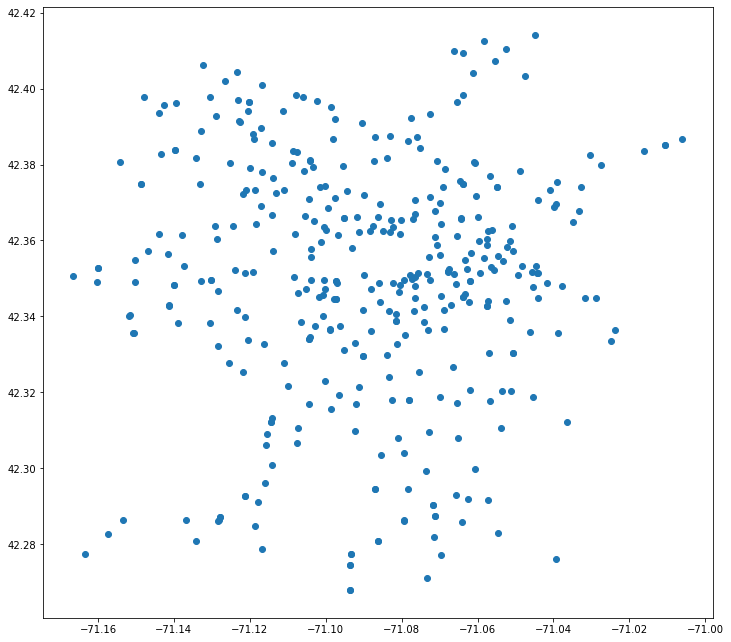

In [37]:
stations_gdf.plot(figsize=(12,12))

In [38]:
stations_gdf.to_file("../Data_Clean/stations_all.shp") 

C:\Users\casey\AppData\Local\Temp\ipykernel_10360\4081733794.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stations_gdf.to_file("../Data_Clean/stations_all.shp")


## Step 2: Create new variables

In [16]:
# df = pd.read_csv('../Data_Clean/trips_cleaned.csv')
# stations = gpd.read_file("../Data_Clean/stations_all.shp")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

### 2.1 Age

In [19]:
list(trips.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender',
 'o_time',
 'o_minofday',
 'o_dayofweek',
 'o_hour']

In [47]:
def age(df):
    list = []
    group_names = {
            '1996': "Gen Z", 
            '1981': "Millenials",
            '1965': "Generation X",
            '1946': "Baby Boomers",
            '1928': "Silent Generation"
        }
    for row in df.index:
        birthyear = df.iloc[row,13]
        int_year = int(birthyear)
        if int_year >= 1996:
            x = group_names['1996']
        elif 1981 <= birthyear < 1996:
            x = group_names['1981']
        elif 1965 <= birthyear < 1981:
            x = group_names['1965']
        elif 1946 <= birthyear < 1965:
            x = group_names['1946']
        elif 1928 <= birthyear < 1946:
            x = group_names['1928']
        else: 
            x = "Other"
        list.append(x)
    return list

In [48]:
trips['age'] = age(trips)

In [40]:
list = []
group_names = {
        '1996': "Gen Z", 
        '1981': "Millenials",
        '1965': "Generation X",
        '1946': "Baby Boomers",
        '1928': "Silent Generation"
        }

In [46]:
for row in trips.index[1:10]:
        birthyear = trips.iloc[row,13]
        print(birthyear)
        int_year = int(birthyear)
        if int_year >= 1996:
            x = group_names['1996']
        elif 1981 <= birthyear < 1996:
            x = group_names['1981']
        elif 1965 <= birthyear < 1981:
            x = group_names['1965']
        elif 1946 <= birthyear < 1965:
            x = group_names['1946']
        elif 1928 <= birthyear < 1946:
            x = group_names['1928']
        else: 
            x = "Other"
        list.append(x)

1985.0
1974.0
1987.0
1986.0
1989.0
1964.0
1981.0
1989.0
1993.0


In [59]:
trips.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'o_time', 'o_minofday', 'o_dayofweek', 'o_hour',
       'age'],
      dtype='object')

### 2.2 Time Period

In [62]:
def time_period(df):
    list = []
    group_names = {
            1: "AM", 
            2: "Midday",
            3: "PM",
            4: "Evening",
            5: "Night"
        }
    for ind in df.index:
        count=1
        hour = df.iloc[ind,18]
        hour = int(hour)
        if 7 <= hour < 10:
            x = group_names[1]
        elif 10 <= hour < 16:
            x = group_names[2]
        elif 16 <= hour < 20:
            x = group_names[3]
        elif 20 <= hour < 24:
            x = group_names[4]
        elif 0 <= hour < 7:
            x = group_names[5]    
        else: 
            x = "Other"
        list.append(x)
    return list

In [63]:
trips['period'] = time_period(trips)

### 2.3 Day of the Week

In [64]:
def day(df):
    list = []
    group_names = {
            1: "Weekday", 
            2: "Weekend"
        }
    for ind in df.index:
        count=1
        day = df.iloc[ind,17]
        day = int(day)
        if day in [6,7]:
            x = group_names[2]
        else: 
            x = group_names[1]
        list.append(x)
    return list

In [65]:
trips['day'] = day(trips)

In [78]:
len(trips)

6765411

In [79]:
trips.to_csv("../Data_Clean/trips_cleaned_new.csv", index=False)

## Step 3: Aggregate Data
### 3.1 Create functions to group data

In [70]:
def group(df, col, agg):
    df1 = df.groupby(col).agg({agg:'count'}).rename(columns = {agg:'n'}).reset_index()
    df1['%'] = (df1.n/sum(df1.n)*100).round(2)
    return df1

In [69]:
def gender_group(df, col, agg):
    if isinstance(col, list):
        cols = col.copy()
        cols += ['gender']
    else: 
        cols = ['gender']
        cols += [col]
    df1 = df.groupby(col).agg({agg:'count'})
    df1 = df1.rename(columns = {agg:'total'}).reset_index()
    df1_f = df[df['gender']=='female']
    df1_f = df1_f.groupby(cols).agg({agg:'count'})
    df1_f = df1_f.rename(columns = {agg:'subtotal'}).reset_index()
    df1_f['g%'] = df1_f.subtotal/sum(df1_f.subtotal)*100
    df1_m = df[df['gender']=='male']
    df1_m = df1_m.groupby(cols).agg({agg:'count'})
    df1_m = df1_m.rename(columns = {agg:'subtotal'}).reset_index()
    df1_m['g%'] = df1_m.subtotal/sum(df1_m.subtotal)*100
    df1_g = pd.merge(df1_f, df1_m, how='outer')
    df1_g = df1_g.merge(df1, how='left')
    df1_g['t%'] = (df1_g.subtotal/df1_g.total)*100
    return df1_g

In [ ]:
def period_group(df, col, agg):
    if isinstance(col, list):
        cols = col.copy()
        cols += ['period']
    else: 
        cols = ['period']
        cols += [col]
    df1 = df.groupby(col).agg({agg:'count'})
    df1 = df1.rename(columns = {agg:'total'}).reset_index()
    df1_AM = df[df['period']=='AM']
    df1_AM = df1_AM.groupby(cols).agg({agg:'count'})
    df1_AM = df1_AM.rename(columns = {agg:'subtotal'}).reset_index()
    df1_AM['p%'] = df1_AM.subtotal/sum(df1_AM.subtotal)*100
    df1_midday = df[df['period']=='Midday']
    df1_midday = df1_midday.groupby(cols).agg({agg:'count'})
    df1_midday = df1_midday.rename(columns = {agg:'subtotal'}).reset_index()
    df1_midday['p%'] = df1_midday.subtotal/sum(df1_midday.subtotal)*100
    df1_PM = df[df['period']=='PM']
    df1_PM = df1_PM.groupby(cols).agg({agg:'count'})
    df1_PM = df1_PM.rename(columns = {agg:'subtotal'}).reset_index()
    df1_PM['p%'] = df1_PM.subtotal/sum(df1_PM.subtotal)*100
    df1_evening = df[df['period']=='Evening']
    df1_evening = df1_evening.groupby(cols).agg({agg:'count'})
    df1_evening = df1_evening.rename(columns = {agg:'subtotal'}).reset_index()
    df1_evening['p%'] = df1_evening.subtotal/sum(df1_evening.subtotal)*100
    df1_night = df[df['period']=='Night']
    df1_night = df1_night.groupby(cols).agg({agg:'count'})
    df1_night = df1_night.rename(columns = {agg:'subtotal'}).reset_index()
    df1_night['p%'] = df1_night.subtotal/sum(df1_night.subtotal)*100
    df1_p = pd.merge(df1_AM, df1_midday, how='outer')
    df1_p = pd.merge(df1_p, df1_PM, how='outer')
    df1_p = pd.merge(df1_p, df1_evening, how='outer')
    df1_p = pd.merge(df1_p, df1_night, how='outer')
    df1_p = df1_p.merge(df1, how='outer')
    df1_p['t%'] = (df1_p.subtotal/df1_p.total)*100
    return df1_p

In [ ]:
age_time_gender = period_group(df, ['age', 'gender'], 'age')

In [ ]:
p=sns.barplot(x="period", y='p%', hue='age', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data=age_time_gender[age_time_gender.gender=='female'])
p.set_title('Female Trips By Time of Day and Age')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
p=sns.barplot(x="period", y='p%', hue='age', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data=age_time_gender[age_time_gender.gender=='male'])
p.set_title('Male Trips By Time of Day and Age')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
age_time= period_group(df, 'age', 'age')
p=sns.barplot(x="period", y='p%', hue='age', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data=age_time)
p.set_title('Trips By Time of Day and Age')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

### Gender

In [ ]:
departures_df = df.groupby('start station id').agg({'gender':'count'}).reset_index().rename(columns = {'gender':'departures'})
arrivals_df = df.groupby('end station id').agg({'gender':'count'}).reset_index().rename(columns = {'gender':'arrivals'})

In [ ]:
female_departures = df[df['gender']=='female'].groupby('start station id').agg({'gender':'count'}).rename(columns = {'gender':'female_departures'}).reset_index()
female_arrivals = df[df['gender']=='female'].groupby('end station id').agg({'gender':'count'}).rename(columns = {'gender':'female_arrivals'}).reset_index()
male_departures = df[df['gender']=='male'].groupby('start station id').agg({'gender':'count'}).rename(columns = {'gender':'male_departures'}).reset_index()
male_arrivals = df[df['gender']=='male'].groupby('end station id').agg({'gender':'count'}).rename(columns = {'gender':'male_arrivals'}).reset_index()

In [ ]:
arrivals_df = arrivals_df.merge(female_arrivals)
arrivals_df = arrivals_df.merge(male_arrivals)
arrivals_df['arrival_trip_parity'] = arrivals_df.female_arrivals/arrivals_df.male_arrivals

In [ ]:
departures_df = departures_df.merge(female_departures)
departures_df = departures_df.merge(male_departures)
departures_df['departure_trip_parity'] = departures_df.female_departures/departures_df.male_departures

In [ ]:
df2 = station_locations.merge(arrivals_df, how='left', right_on='end station id', left_on='station id').reset_index(drop=True)

In [ ]:
df3 = df2.merge(departures_df, how='left', right_on='start station id', left_on='station id')

In [ ]:
df4 = df3.drop(columns=["end station id", 'start station id'])

In [ ]:
df4.to_csv('../New Data Tables/stations_gender_parity.csv', index=False)

In [ ]:
sns.countplot(x=df["gender"])

In [ ]:
sns.countplot(x=df["age"], order=['Gen Z', 'Millenials', 'Generation X', 'Baby Boomers', "Silent Generation", "Other"])

In [ ]:
p=sns.countplot(x='age', hue='gender', order=['Gen Z', 'Millenials', 'Generation X', 'Baby Boomers', "Silent Generation", "Other"], data = df)
p.set_title('Trips By Age and Gender')

In [ ]:
trips_by_age_gender=gender_group(df, 'age', 'age')
trips_by_age_gender

In [ ]:
p = sns.barplot(x='age', y='t%', hue='gender', order=['Gen Z', 'Millenials', 'Generation X', 'Baby Boomers', "Silent Generation", "Other"], data = trips_by_age_gender)
p.set_title('Trip Parity By Age')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
p = sns.barplot(x='age', y='g%', hue='gender', order=['Gen Z', 'Millenials', 'Generation X', 'Baby Boomers', "Silent Generation", "Other"], data = trips_by_age_gender)
p.set_title('Trips By Age and Gender')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

<AxesSubplot: xlabel='period', ylabel='count'>

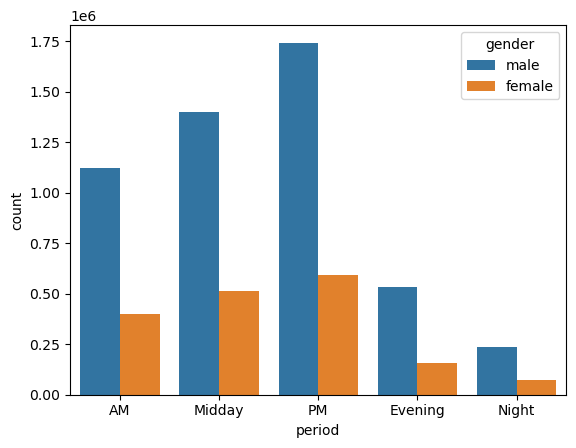

In [80]:
sns.countplot(x="period", hue='gender', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data=trips)

In [72]:
trips_by_time_gender=gender_group(trips, ['period'], 'period')
trips_by_time_gender

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [ ]:
p = sns.barplot(x='period', y='t%', hue='gender', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data = trips_by_time_gender)
p.set_title('Trip Parity by Time of Day')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
p = sns.barplot(x='period', y='g%', hue='gender', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data = trips_by_time_gender)
p.set_title('Percent of Trips By Gender By Time of Day')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
trips_by_time_gender_age=gender_group(df, ['period', 'age'], 'period')
trips_by_time_gender_age

In [ ]:
p = sns.barplot(x='period', y='t%', hue='gender', order=['AM', 'Midday', 'PM', 'Evening', 'Night'], data = trips_by_time_gender_age)
p.set_title('Trips By Time of Day and Gender')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
def day_period(df):
    list = []
    group_names = {
            1: "Weekday", 
            2: "Weekend"
        }
    for ind in df.index:
        count=1
        day = df.iloc[ind,18]
        day = int(day)
        if day in [6,7]:
            x = group_names[2]
        else: 
            x = group_names[1]
        list.append(x)
    return list

In [ ]:
df['day'] = day_period(df)

In [ ]:
gender_day = gender_group(df, 'day', 'day')
p=sns.barplot(x="day", y='t%', hue='gender', data=gender_day)
p.set_title('Trips By Day of Week')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

In [ ]:
df1 = df.groupby(['day']).agg({'day':'count'}).rename(columns = {'day':'n'}).reset_index()
df1

In [ ]:
sns.barplot(x="day", y="n", hue='gender', data=df1)

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('bluebikes_trips_2015_2019.csv')

In [ ]:
df1 = df.groupby('gender').agg({'gender':'count'}).rename(columns = {'gender':'trips'}).reset_index()
df1['portion'] = df1['trips']/(len(df))*100
df1
# 1,735,298 trips by women, accounting for 26 percent of all bikeshare trips in 2015-2019

In [ ]:
p = sns.barplot(x='gender', y='portion', data = df1)
p.set_title('Network-Wide Trip Parity')
for container in p.containers:
    p.bar_label(container, fmt='%.f%%')

## Temporal Analysis

In [ ]:
# count the number of trips start by each hour
o_trip_hour = df.groupby(['o_dayofweek','o_hour']).agg({'o_hour':'count'}).rename(columns = {'o_hour':'total'}).reset_index()

In [ ]:
o_trip_hour['h_week']=o_trip_hour.index

In [ ]:
o_trip_hour

In [ ]:
ax = sns.lineplot(x="h_week", y="total", data=o_trip_hour).set(title='Trips by Hour of the Week')

### Gender Analysis

In [ ]:
# count the number of trips start by each hour
o_trip_hour2 = df.groupby(['o_dayofweek','o_hour', 'gender']).agg({'o_hour':'count'}).rename(columns = {'o_hour':'trips'}).reset_index()

In [ ]:
x = range(0,168)
o_trip_hour2['h_week'] = np.repeat(x,2)

In [ ]:
o_trip_hour = o_trip_hour.merge(o_trip_hour2)
o_trip_hour[:5]

<b> Trips by women have morning and afternoon peaks during the weekdays. Far fewer women are riding on the weekends than weekdays. Trips by men have even steeper weekday peaks in the AM and PM. Midday trips are about the same, regardless of the day of the week for men. 

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour['gender']=='female']).set(title='Female Trips by the Hour of the Day and Day of the Week')

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour['gender']=='male']).set(title='Male Trips by the Hour of the Day and Day of the Week')

In [ ]:
ax = sns.lineplot(x="h_week", y="trips", hue='gender', data=o_trip_hour).set(title='Trips by the Hour of the Week by Gender')

In [ ]:
 o_trip_hour['portion'] = o_trip_hour['trips']/o_trip_hour['total']

In [ ]:
trip_parity = []
for x in o_trip_hour.index:
    if o_trip_hour.loc[x,'gender'] == 'female': 
        female = o_trip_hour.loc[x,'trips']
        y=x+1
        male = o_trip_hour.loc[y,'trips']
        trip_parity.append(female/male)
    elif o_trip_hour.loc[x,'gender'] == 'male': 
        male = o_trip_hour.loc[x,'trips']
        y=x-1
        female = o_trip_hour.loc[y,'trips']
        trip_parity.append(female/male)
o_trip_hour['trip_parity'] = trip_parity

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='gender', data=o_trip_hour)

<b>Trip parity rates are highest on during the AM peak of weekdays and on the weekend. 

In [ ]:
ax = sns.lineplot(x="h_week", y="trip_parity", data=o_trip_hour).set(title='Trip Parity by Hour of the Week')

### Age Analysis

In [ ]:
# count the number of trips start by each hour
o_trip_hour3 = df.groupby(['o_dayofweek','o_hour', 'age', 'gender']).agg({'o_hour':'count'}).rename(columns = {'o_hour':'trips'}).reset_index()

In [ ]:
o_trip_hour3

In [ ]:
o_trip_hour3 = o_trip_hour.merge(o_trip_hour3)
o_trip_hour3[:5]

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour3[o_trip_hour3['age']=='Millenials']).set(title='Millenial Trips by the Hour of the Day and Day of the Week')
plt.yscale('log')

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue=o_trip_hour3[['o_dayofweek', 'gender']].apply(tuple, axis=1), data=o_trip_hour3[o_trip_hour3['age']=='Millenials']).set(title='Millenial Trips by the Hour of the Day and Day of the Week')

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour3[o_trip_hour3['age']=='Generation X']).set(title='Generation X Trips by the Hour of the Day and Day of the Week')

In [ ]:
len(o_trip_hour3[o_trip_hour3['age']=='Silent Generation'])

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour3[o_trip_hour3['age']=='Silent Generation']).set(title='Silent Generation Trips by the Hour of the Day and Day of the Week')

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour3[o_trip_hour3['age']=='Baby Boomers']).set(title='Baby Boomers Trips by the Hour of the Day and Day of the Week')

In [ ]:
df1 = df.groupby('age').agg({'age':'count'}).rename(columns = {'age':'total'})
df1['portion'] = df1['total']/(len(df))
df1
# Millenials rode 62% of bikeshare trips in 2015-2019

In [ ]:
# count the number of trips start by each hour
o_trip_hour3 = df.groupby(['o_dayofweek','o_hour']).agg({'o_hour':'count'}).rename(columns = {'o_hour':'total'}).reset_index()

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='age', data=o_trip_hour3)

In [ ]:
o_trip_hour3['portion_day'] = o_trip_hour3['trips']/o_trip_hour3['total']

In [ ]:
ax = sns.lineplot(x="o_hour", y="portion_day", hue='age', data=o_trip_hour3)

In [ ]:
o_trip_hour3['h_week']=o_trip_hour3.index

In [ ]:
# count the number of trips start by each hour
o_trip_hour4 = df.groupby(['o_dayofweek','o_hour', 'age']).agg({'o_hour':'count'}).rename(columns = {'o_hour':'trips'}).reset_index()

In [ ]:
o_trip_hour4

In [ ]:
o_trip_hour3 = o_trip_hour3.merge(o_trip_hour4)
o_trip_hour3[:5]

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour3['age']=='Baby Boomers'])

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour3['age']=='Millenials'])

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour3['age']=='Generation X'])

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='o_dayofweek', data=o_trip_hour[o_trip_hour3['age']=='Gen Z'])

In [ ]:
ax = sns.lineplot(x="h_week", y="trips", hue='age', data=o_trip_hour3).set(title='Trips by the Hour of the Week by Age Group')

In [ ]:
o_trip_hour5 = o_trip_hour3.merge(df1, on='age', how='left')
o_trip_hour5.head(3)

In [ ]:
o_trip_hour5['portion'] = o_trip_hour5['trips']/o_trip_hour5['total_y']

In [ ]:
ax = sns.lineplot(x="h_week", y="portion", hue='age', data=o_trip_hour5)
plt.yscale('log')

In [ ]:
ax = sns.lineplot(x="o_hour", y="trips", hue='age', data=o_trip_hour5)